# Simple wordcloud in Python

In [1]:
from bs4 import BeautifulSoup
import pandas as pd
from nltk import word_tokenize
from nltk.stem import RSLPStemmer
from nltk.corpus import stopwords

In [2]:
def carregar_conteudo(filename):
    with open(filename, encoding='utf-8') as f:
        data = f.read()
        return data

def get_promocoes_local(filename = '/Users/heldergeraldoribeiro/Documents/estudos/data-science/tcc-pucmg/data/melhores_destinos/index.html'):
    # Faz parte do conteudo usando o BeautifulSoup
    content = carregar_conteudo(filename)
    soup = BeautifulSoup(content, 'html.parser')

    # Carrega titulos e resumos dos posts
    articles = soup.find_all('div', { "class":  "post-promo-home-c2"})

    aa = [(a.findChild('a').get('title'), a.getText()) for a in articles]

    md_posts = pd.DataFrame(aa, columns = ['Titulo', 'Texto'])
    return md_posts

def clean_melhores_destinos_local(md_posts):
    # Converte conteudo para lowercase
    md_posts['Texto_clean'] = md_posts['Texto'].apply(lambda x: x.lower())
    
    # Quebra os posts em tokens
    md_posts['Texto_tokens'] = md_posts['Texto_clean'].apply(lambda x: word_tokenize(x))

    # Remove stopwords em portuges
    pt_stop = stopwords.words('portuguese')
    md_posts['Texto_tokens'] = md_posts['Texto_tokens'].apply(lambda xs: [x for x in xs if x not in pt_stop])

    stemmer = RSLPStemmer()
    md_posts['Texto_stem'] = md_posts['Texto_tokens'].apply(lambda x: [stemmer.stem(y) for y in x])

    return md_posts

prom = get_promocoes_local()
prom = clean_melhores_destinos_local(prom)
# Junta todos os textos em um unico string
all_texts = ' '.join([' '.join(a) for a in prom['Texto_stem'].values])

In [4]:
import matplotlib.pyplot as plt

def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display name
    plt.imshow(wordcloud)
    # No axis detail
    plt.axis("off")

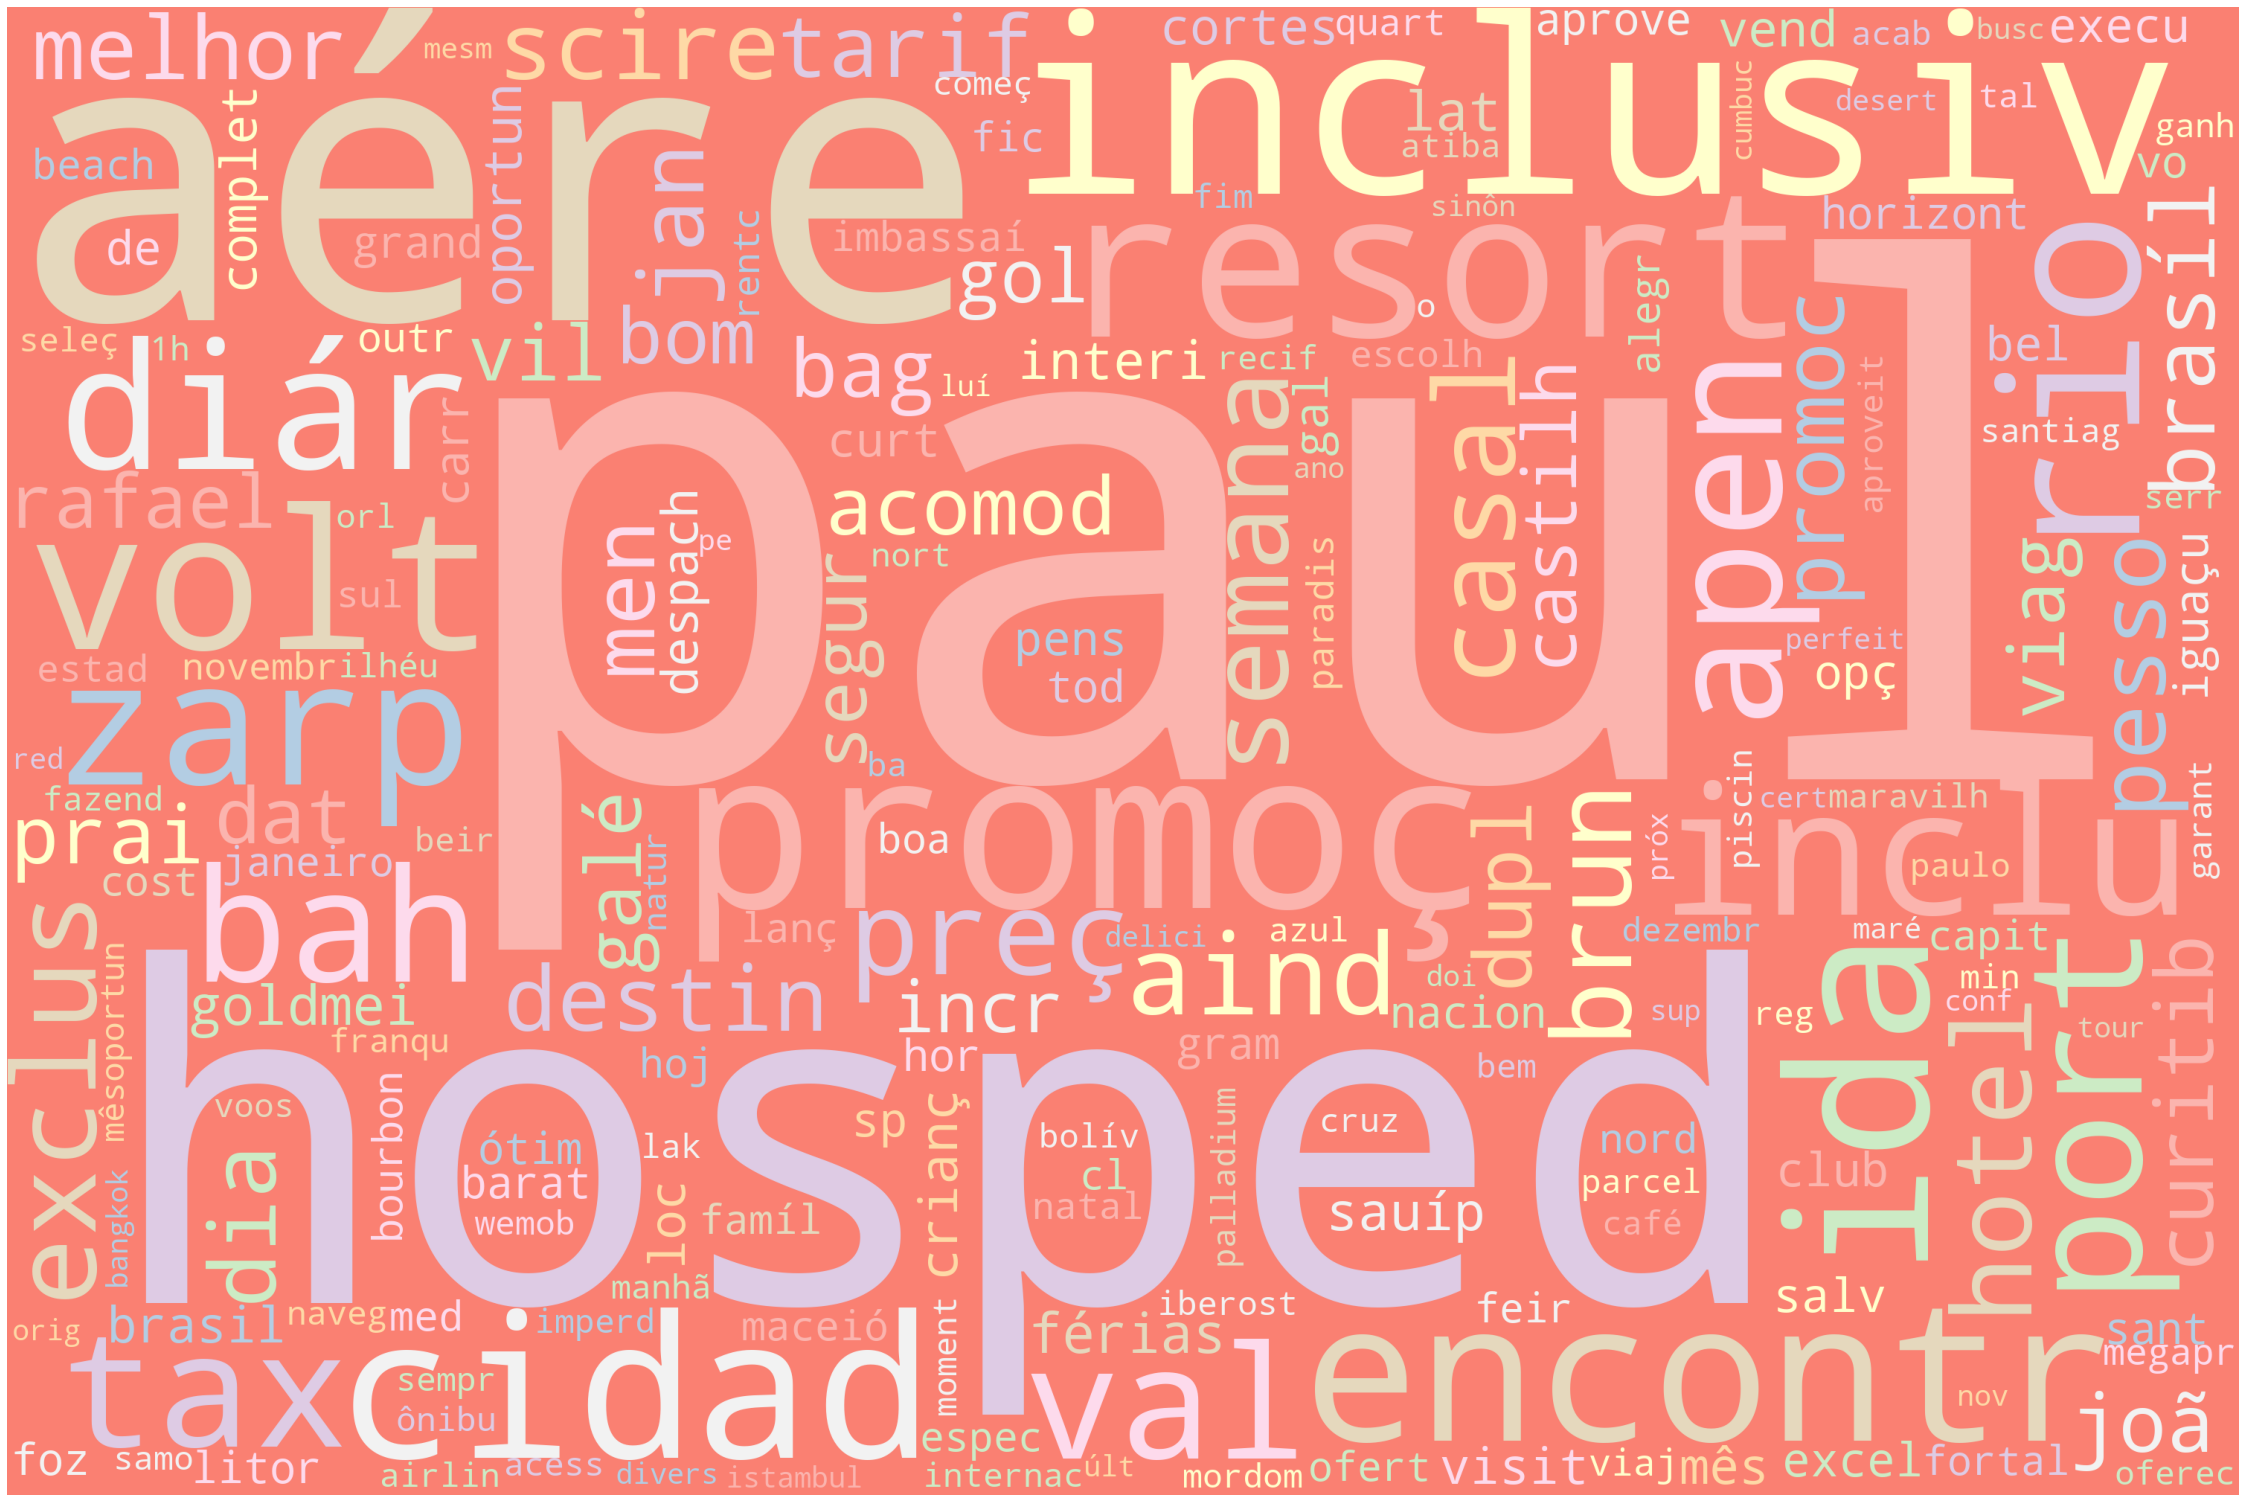

In [9]:
from wordcloud import WordCloud, STOPWORDS

my_list = ['voo', 'pass', 'descont', 'part', 'pacot', 'saind', 'leonard', 'cassol']
my_stop_words = my_list + list(STOPWORDS)

# Generate wordcloud
wordcloud = WordCloud(width=3000, height=2000, random_state=1, background_color="salmon", 
    colormap="Pastel1", collocations=False, stopwords=my_stop_words).generate(all_texts)

# Plot cloud
plot_cloud(wordcloud)